In [21]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
bk = pd.read_csv('Brooklyn CD Socio-Economic.csv')

In [3]:
list(bk.columns)

['the_geom',
 'cartodb_id',
 'the_geom_webmercator',
 'acres',
 'acs_tooltip',
 'acs_tooltip_2',
 'acs_tooltip_3',
 'area_sqmi',
 'borocd',
 'cb_email',
 'cb_website',
 'cd_full_title',
 'cd_short_title',
 'cd_son_fy2018',
 'cd_tot_bldgs',
 'cd_tot_resunits',
 'count_hosp_clinic',
 'count_libraries',
 'count_parks',
 'count_public_schools',
 'crime_count',
 'crime_count_boro',
 'crime_count_nyc',
 'crime_per_1000',
 'crime_per_1000_boro',
 'crime_per_1000_nyc',
 'female_10_14',
 'female_15_19',
 'female_20_24',
 'female_25_29',
 'female_30_34',
 'female_35_39',
 'female_40_44',
 'female_45_49',
 'female_5_9',
 'female_50_54',
 'female_55_59',
 'female_60_64',
 'female_65_69',
 'female_70_74',
 'female_75_79',
 'female_80_84',
 'female_85_over',
 'female_under_5',
 'fp_100_area',
 'fp_100_bldg',
 'fp_100_cost_burden',
 'fp_100_cost_burden_value',
 'fp_100_mhhi',
 'fp_100_mortg_value',
 'fp_100_openspace',
 'fp_100_ownerocc',
 'fp_100_ownerocc_value',
 'fp_100_permortg',
 'fp_100_pop',
 

In [4]:
nn_var = ['crime_per_1000',
         'pct_asian_nh',
         'pct_bach_deg',
         'pct_black_nh',
         'pct_foreign_born',
         'pct_hispanic',
         'pct_other_nh',
         'pct_white_nh',
         'poverty_rate',
         'unemployment_cd']

In [5]:
X = bk[nn_var]
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [6]:
distances_df = pd.DataFrame(distances)
distances_df.head()

,0,1
0,0.0,27.790554
1,0.0,30.905476
2,0.0,18.602791
3,0.0,38.922772
4,0.0,28.516575


In [7]:
indices_df = pd.DataFrame(indices)

In [8]:
bk['nn_distances'] = distances_df[1]
bk['nn_indices'] = indices_df[1]

In [9]:
cd_list = ['cd_short_title','neighborhoods','nn_distances', 'nn_indices']

In [10]:
bk[cd_list]

,cd_short_title,neighborhoods,nn_distances,nn_indices
0,Brooklyn CD 1,"East Williamsburg, Greenpoint, Northside, Sout...",27.790554,5
1,Brooklyn CD 2,"Boerum Hill, Brooklyn Heights, Clinton Hill, D...",30.905476,5
2,Brooklyn CD 3,"Bedford-Stuyvesant, Stuyvesant Heights, Tompki...",18.602791,7
3,Brooklyn CD 4,Bushwick,38.922772,6
4,Brooklyn CD 5,"Broadway Junction, City Line, Cypress Hills, E...",28.516575,15
5,Brooklyn CD 6,"Carroll Gardens, Cobble Hill, Columbia St, Gow...",27.790554,0
6,Brooklyn CD 7,"Sunset Park, Windsor Terrace",36.045222,10
7,Brooklyn CD 8,"Crown Heights, Prospect Heights, Weeksville",16.188186,17
8,Brooklyn CD 9,"Crown Heights South, Prospect Lefferts Gardens...",8.186782,17
9,Brooklyn CD 10,"Bay Ridge, Dyker Heights, Fort Hamilton",17.556951,14


In [11]:
v = cosine_similarity(X)

In [12]:
df = pd.DataFrame(v, columns = X.index.values).reset_index()
df = df.drop(columns=['index'])

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000,0.929179,0.717408,0.719963,0.504070,0.965575,0.752505,0.676746,0.609622,0.949720,0.813310,0.943079,0.925260,0.882785,0.942339,0.384982,0.385058,0.624923
1,0.929179,1.000000,0.849826,0.701131,0.609964,0.957659,0.689452,0.845370,0.768031,0.873065,0.739259,0.818786,0.858966,0.914467,0.855869,0.562798,0.587917,0.785211
2,0.717408,0.849826,1.000000,0.775755,0.898475,0.683185,0.643213,0.976519,0.951232,0.667268,0.601155,0.635238,0.735335,0.890833,0.661020,0.900749,0.871454,0.943198
3,0.719963,0.701131,0.775755,1.000000,0.857281,0.622187,0.889167,0.723933,0.688875,0.706900,0.693376,0.622893,0.748385,0.799786,0.659468,0.685026,0.594598,0.678670
4,0.504070,0.609964,0.898475,0.857281,1.000000,0.406378,0.708654,0.872864,0.887427,0.512043,0.551518,0.442240,0.618805,0.775735,0.494526,0.947809,0.887752,0.866085
5,0.965575,0.957659,0.683185,0.622187,0.406378,1.000000,0.647296,0.670259,0.576578,0.894988,0.724792,0.867924,0.848112,0.831467,0.879907,0.326594,0.349965,0.599220
6,0.752505,0.689452,0.643213,0.889167,0.708654,0.647296,1.000000,0.627203,0.603442,0.856161,0.917316,0.739766,0.854573,0.825785,0.800039,0.518783,0.487948,0.608240
7,0.676746,0.845370,0.976519,0.723933,0.872864,0.670259,0.627203,1.000000,0.983751,0.663109,0.616973,0.607066,0.739411,0.903463,0.664596,0.906986,0.919628,0.982294
8,0.609622,0.768031,0.951232,0.688875,0.887427,0.576578,0.603442,0.983751,1.000000,0.622728,0.611164,0.573351,0.727194,0.886732,0.643387,0.932589,0.962991,0.996536
9,0.949720,0.873065,0.667268,0.706900,0.512043,0.894988,0.856161,0.663109,0.622728,1.000000,0.949607,0.957104,0.975744,0.910615,0.986792,0.391479,0.421275,0.643402


In [15]:
s

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0.929179,0.717408,0.719963,0.50407,0.965575,0.752505,0.676746,0.609622,0.94972,0.81331,0.943079,0.92526,0.882785,0.942339,0.384982,0.385058,0.624923
1,0.929179,1,0.849826,0.701131,0.609964,0.957659,0.689452,0.84537,0.768031,0.873065,0.739259,0.818786,0.858966,0.914467,0.855869,0.562798,0.587917,0.785211
2,0.717408,0.849826,1,0.775755,0.898475,0.683185,0.643213,0.976519,0.951232,0.667268,0.601155,0.635238,0.735335,0.890833,0.66102,0.900749,0.871454,0.943198
3,0.719963,0.701131,0.775755,1,0.857281,0.622187,0.889167,0.723933,0.688875,0.7069,0.693376,0.622893,0.748385,0.799786,0.659468,0.685026,0.594598,0.67867
4,0.50407,0.609964,0.898475,0.857281,1,0.406378,0.708654,0.872864,0.887427,0.512043,0.551518,0.44224,0.618805,0.775735,0.494526,0.947809,0.887752,0.866085
5,0.965575,0.957659,0.683185,0.622187,0.406378,1,0.647296,0.670259,0.576578,0.894988,0.724792,0.867924,0.848112,0.831467,0.879907,0.326594,0.349965,0.59922
6,0.752505,0.689452,0.643213,0.889167,0.708654,0.647296,1,0.627203,0.603442,0.856161,0.917316,0.739766,0.854573,0.825785,0.800039,0.518783,0.487948,0.60824
7,0.676746,0.84537,0.976519,0.723933,0.872864,0.670259,0.627203,1,0.983751,0.663109,0.616973,0.607066,0.739411,0.903463,0.664596,0.906986,0.919628,0.982294
8,0.609622,0.768031,0.951232,0.688875,0.887427,0.576578,0.603442,0.983751,1,0.622728,0.611164,0.573351,0.727194,0.886732,0.643387,0.932589,0.962991,0.996536
9,0.94972,0.873065,0.667268,0.7069,0.512043,0.894988,0.856161,0.663109,0.622728,1,0.949607,0.957104,0.975744,0.910615,0.986792,0.391479,0.421275,0.643402


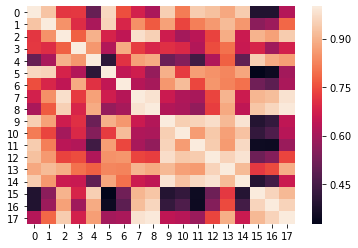

In [30]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(v)

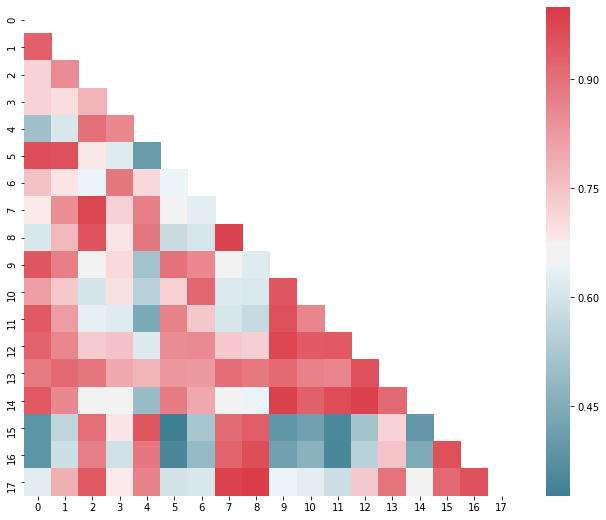

In [38]:
# # Generate a mask for the upper triangle
mask = np.triu(np.ones_like(v, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(v, cmap=cmap, mask=mask)

In [62]:
df.to_csv('cosine_similarity.csv')